# read data

In [264]:
import pandas as pd
content = pd.read_csv('Training Data.csv')

In [197]:
content.head()

,ProductID,Alpha Test,Beta Test,Status,Target
0,104,-0.15035,-0.367690,Rejected,1
1,98,0.63882,0.889620,Rejected,1
2,108,-0.61118,-0.067982,Rejected,1
3,76,0.46601,-0.418860,Rejected,1
4,78,0.28744,-0.769740,Rejected,1


In [265]:
content['Target'] = content['Status'].apply(lambda x: 1 if x=='Rejected' else 0) # numericalize the target

In [266]:
content.info() # datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ProductID   98 non-null     int64  
 1   Alpha Test  98 non-null     float64
 2   Beta Test   98 non-null     float64
 3   Status      98 non-null     object 
 4   Target      98 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


In [267]:
content.describe()

,ProductID,Alpha Test,Beta Test,Target
count,98.000000,98.000000,98.000000,98.000000
mean,59.397959,0.070132,0.202045,0.530612
std,33.728980,0.503447,0.513910,0.501628
min,0.000000,-0.830070,-0.769740,0.000000
25%,31.500000,-0.349080,-0.225145,0.000000
50%,60.500000,0.022465,0.282890,1.000000
75%,86.750000,0.514980,0.668492,1.000000
max,117.000000,1.070900,1.108900,1.000000


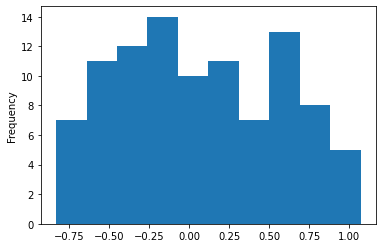

In [268]:
content['Alpha Test'].plot.hist()

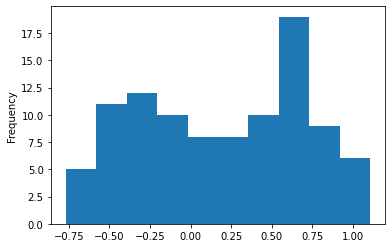

In [269]:
content['Beta Test'].plot.hist()

It shows that we have 2 clusters in each test.

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

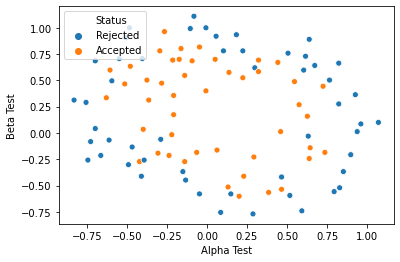

In [271]:
# scatter plot

fig,ax = plt.subplots()
sns.scatterplot(data=content, hue='Status', x='Alpha Test', y='Beta Test')
plt.legend(loc=2)
plt.savefig('scatter.png')
plt.show()

It seems that we can use a non linear model to separate two groups. SVM is really good at this task.

In [272]:
features = content[['Alpha Test', 'Beta Test']]
y_train = content['Target']

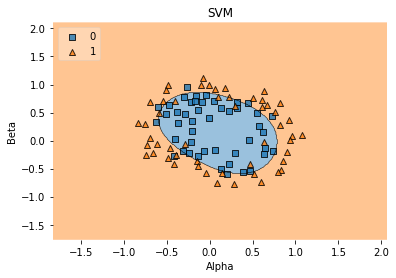

In [273]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import SVC


# Training a classifier
svm = SVC(kernel='rbf', C=2)

X = np.array(features)
y = np.array(y_train)

svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('SVM')
plt.show()


In [274]:
# Try a search for optimal parameters:
from sklearn.model_selection import GridSearchCV
svm = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[.1, 1, 10]}


clf = GridSearchCV(svm, parameters)
clf.fit(X, y)

print("Best score: %0.3f" % clf.best_score_)
print("Best parameters set:")
best_parameters = clf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.817
Best parameters set:
	C: 10
	kernel: 'rbf'


# Predict on test

In [275]:
test = pd.read_csv('Testing Data.csv', index_col=0)
test.head()

,Alpha Test,Beta Test
ProductID,,
22,-0.593890,0.005117
8,0.016705,-0.404240
16,0.166470,0.538740
11,0.529380,-0.521200
41,0.483290,-0.184940


In [276]:
test_features = np.array(test[['Alpha Test', 'Beta Test']])

test_predictions = clf.predict(test_features)

(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

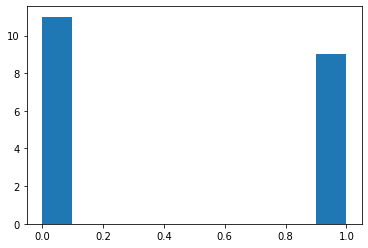

In [277]:
plt.hist(test_predictions)

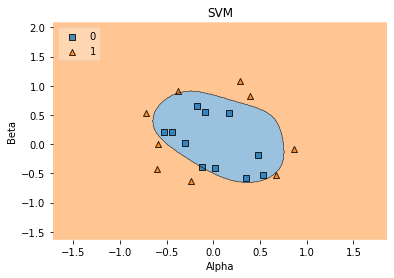

In [278]:
# Plotting decision regions
plot_decision_regions(test_features, test_predictions, clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('SVM')
plt.show()

In [279]:
test['Target'] = test_predictions
test['Status'] = test['Target'].apply(lambda x: 'Rejected' if x==1 else 'Accepted')

In [263]:
test[['Status']].to_csv('sub.csv')